In [ ]:
#https://www.kaggle.com/bavalpreet26/coronavirus-analysis
#https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
#https://github.com/mashhadazam/datacookies/blob/master/CoronaVirus%20-%202019.ipynb

In [142]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython import display
from ipywidgets import interact, widgets

## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
#Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

#ConfirmedCases_raw=pd.read_csv('./time_series_19-covid-Confirmed.csv')

In [143]:
ConfirmedCases_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


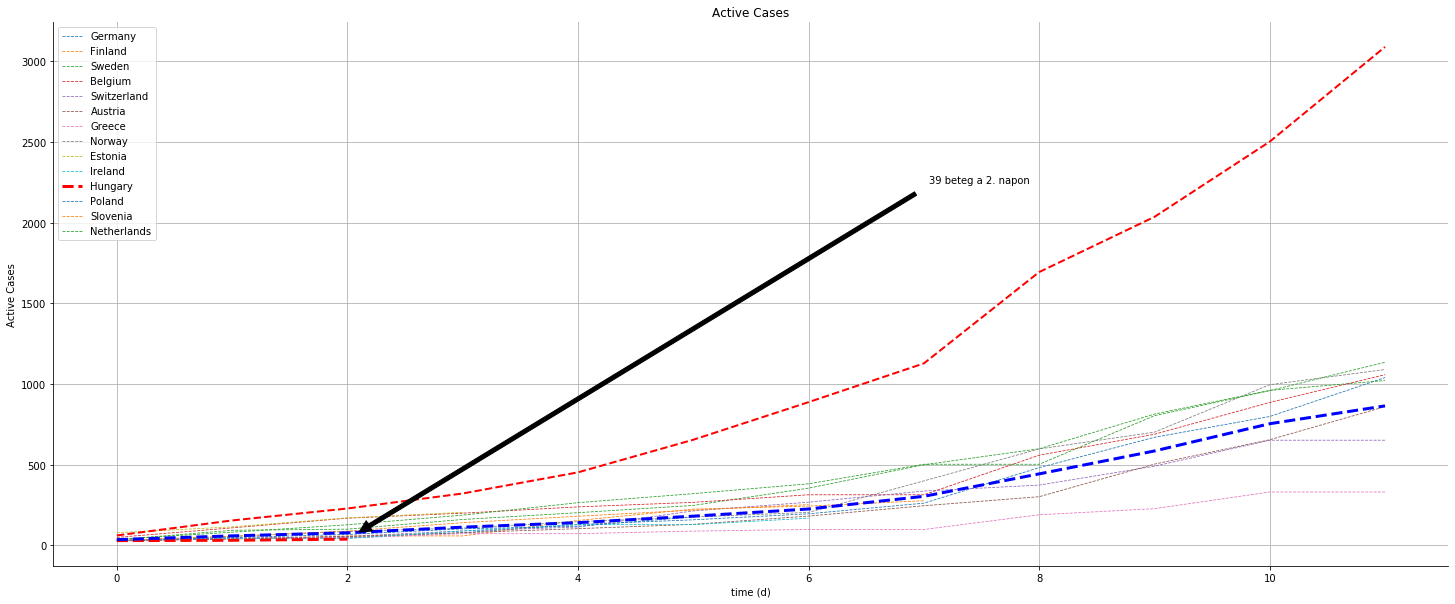

In [144]:
#cut-off for case num
case_num  = 25
days_after_cutoff = 12

best_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Austria|Greece|Hungary|Poland|Estonia|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Netherlands|Finland|Ireland', case= False, regex= True)].T[4:]
worst_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Spain|Italy', case= False, regex= True)].T[4:]

best_case_country_data = []
best_case_countries = []

for i in best_case_data.columns[:-1]:
    #print(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_country_data.append(best_case_data[best_case_data[(best_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values)


worst_case_country_data = []
worst_case_countries = []

for i in worst_case_data.columns[:-1]:
    #print(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    worst_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    worst_case_country_data.append(worst_case_data[worst_case_data[(worst_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values)
    


fig, ax = plt.subplots()

a = best_case_country_data[:days_after_cutoff]
best_mean_cases = [np.mean([x[i] for x in a if len(x) > i]) for i in range(days_after_cutoff)]

b = worst_case_country_data[:days_after_cutoff]
worst_mean_cases = [np.mean([x[i] for x in b if len(x) > i]) for i in range(days_after_cutoff)]


#ax.plot(ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Hungary|Poland|Estonia|Ireland|Luxemburg', case= False, regex= True)].T[4:])
k = 0


for i in best_case_country_data:
    
    if best_case_countries.index("Hungary") == k:
        ax.plot(i,'r--', linewidth=3.0)
        #dot = ax.plot(i.argmax(), i.max(), marker='o', markersize=6, color="green")
        ax.annotate(str(int(i.max())) + " beteg a " + str(int(i.argmax())) + ". napon", xy=(i.argmax(), (i.max())),  xycoords='data',
            xytext=(0.7, 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.02),
            horizontalalignment='right', verticalalignment='bottom',
            )
    else:
        ax.plot(i[:days_after_cutoff], '--', linewidth=0.8)
    k = k+1

plt.legend(best_case_countries)
plt.rcParams['figure.figsize'] = [25, 10]

ax.plot(best_mean_cases, 'b--', linewidth=3.0)
ax.plot(worst_mean_cases, 'r--', linewidth=2.0)

ax.set(xlabel='time (d)', ylabel='Active Cases', title='Active Cases')
ax.grid()

for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)

fig.savefig("covid_16_03.png")
plt.show()



In [145]:
d = 16
index = 0
for i in range(0,len(best_mean_cases)):
    print("2020-03-"+str(d)+" : ",int(best_mean_cases[i]))
    index = index + 1
    d= d+1

2020-03-16 :  36
2020-03-17 :  59
2020-03-18 :  78
2020-03-19 :  113
2020-03-20 :  141
2020-03-21 :  181
2020-03-22 :  225
2020-03-23 :  304
2020-03-24 :  443
2020-03-25 :  585
2020-03-26 :  754
2020-03-27 :  864


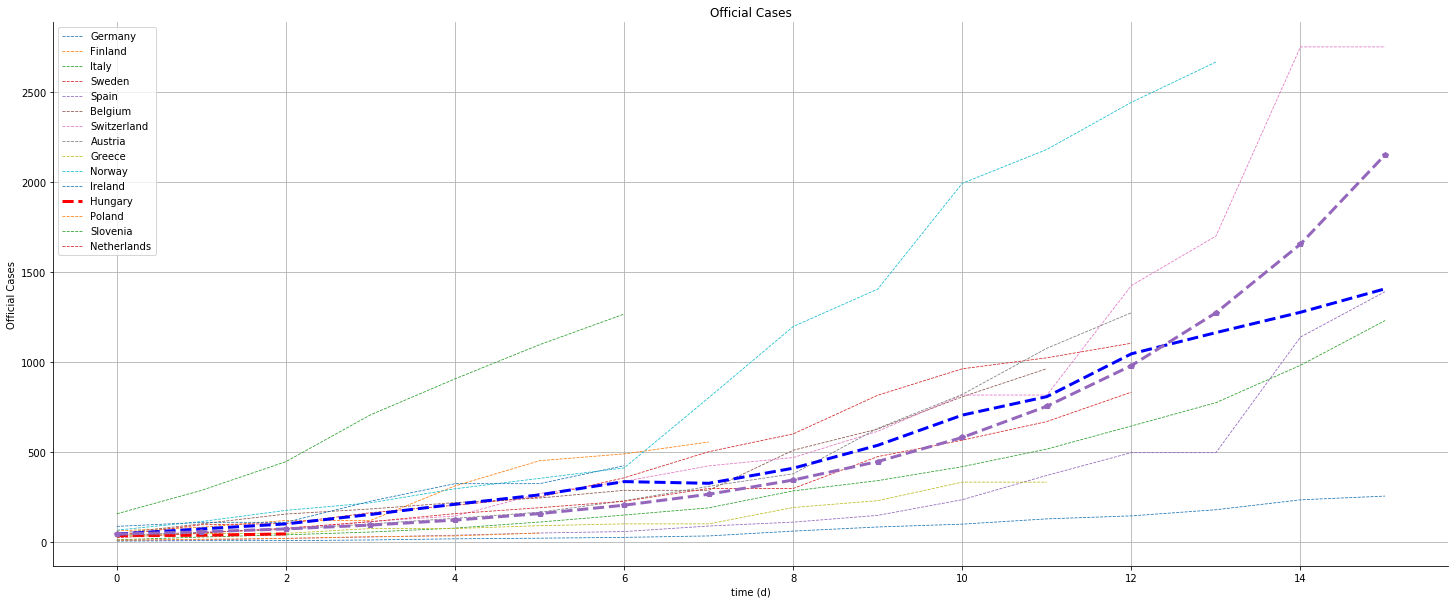

In [176]:
# load population dataset
pop_clean_data = pd.read_csv("./population_clean.csv")

# select only the latest data
pop = pop_clean_data.loc[:, ['Country Name', '2018']]

# replace country names 
name = {
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'Macao SAR, China': 'Macau',
    'Hong Kong SAR': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'Republic of Korea',
    'United Kingdom': 'UK',
    'United States': 'US' }
pop.loc[:, 'Country Name'] = pop.loc[: 'Country Name'].replace(name)

pop[pop['Country Name'].str.contains('Spain|Italy|Austria|Greece|Hungary|Poland|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Netherlands|Finland|Ireland', case=False, regex=True)]

def normalizebypop(country):
    global pop
    return int(pop[pop['Country Name'].str.contains(country, case=False, regex=True)]["2018"].values[0]/1000000)

#print(normalizebypop("Hungary"))

#cut-off for case num
case_num  = 25
days_after_cutoff = 16

best_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Spain|Italy|Austria|Greece|Hungary|Poland|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Netherlands|Finland|Ireland', case= False, regex= True)].T[4:]


best_case_country_data = []
best_case_countries = []

for i in best_case_data.columns[:-1]:
    country = ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0]
    best_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_country_data.append(10*best_case_data[best_case_data[(best_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values/normalizebypop(country))

fig, ax = plt.subplots()

a = best_case_country_data[:days_after_cutoff]
best_mean_cases = [np.mean([x[i] for x in a if len(x) > i]) for i in range(days_after_cutoff)]

k = 0

for i in best_case_country_data:
    
    if best_case_countries.index("Hungary") == k:
        ax.plot(i,'r--', linewidth=3.0)
        #dot = ax.plot(i.argmax(), i.max(), marker='o', markersize=6, color="green")
        #ax.annotate(str(int(i.max())) + " beteg a " + str(int(i.argmax())) + ". napon", xy=(i.argmax(), (i.max())),  xycoords='data',xytext=(0.7, 0.7), textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.02),horizontalalignment='right', verticalalignment='bottom')
    else:
        ax.plot(i[:days_after_cutoff], '--', linewidth=0.8)
    k = k + 1

plt.legend(best_case_countries)
plt.rcParams['figure.figsize'] = [25, 10]


# plotting average cases
ax.plot(best_mean_cases, 'b--', linewidth=3.0)
  

#plotting a curve with R.1.3
r13_curve = []
r14_curve = []
r11_curve = []
for i in range(0,len(best_mean_cases)):
    if i == 0:
        r13_curve.append(best_mean_cases[0])
        r14_curve.append(best_mean_cases[0])
        r11_curve.append(best_mean_cases[0])

    else:
        r13_curve.append(1.3*r13_curve[-1])
        r11_curve.append(1.1*r11_curve[-1])
        r14_curve.append(1.4*r14_curve[-1])

#ax.plot(r14_curve, 'p--', linewidth=3.0)
ax.plot(r13_curve, 'p--', linewidth=3.0)
#ax.plot(r11_curve, 'p--', linewidth=3.0)

    
ax.set(xlabel='time (d)', ylabel='Official Cases', title='Official Cases')
ax.grid()

for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)

fig.savefig("covid_16_03_norm.png")
plt.show()

In [163]:
import datetime

dt = datetime.datetime(2020, 3, 16)
step = datetime.timedelta(seconds=86400)

index = 0
for i in range(0,len(best_mean_cases)):
    date = dt.strftime('%Y-%m-%d')
    #print(date+" : ",int(best_mean_cases[i]), "ICU: ~",int(0.05*best_mean_cases[i]),"-",int(0.35*best_mean_cases[i]))
    print(date+" : ",int(best_mean_cases[i]), "- R:", int(100*best_mean_cases[i]/best_mean_cases[i-1])/100)
    index = index + 1
    dt += step



2020-03-16 :  42 - R: 0.02
2020-03-17 :  70 - R: 1.68
2020-03-18 :  98 - R: 1.39
2020-03-19 :  151 - R: 1.53
2020-03-20 :  208 - R: 1.37
2020-03-21 :  260 - R: 1.25
2020-03-22 :  333 - R: 1.28
2020-03-23 :  324 - R: 0.97
2020-03-24 :  408 - R: 1.25
2020-03-25 :  535 - R: 1.31
2020-03-26 :  703 - R: 1.31
2020-03-27 :  806 - R: 1.14
2020-03-28 :  1044 - R: 1.29
2020-03-29 :  1162 - R: 1.11
2020-03-30 :  1275 - R: 1.09
2020-03-31 :  1405 - R: 1.1
